In [28]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import homogeneity_score,completeness_score,classification_report,confusion_matrix,mean_squared_error,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder,PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


pd.set_option('display.max_rows', 1300)
pd.set_option('display.max_columns', 1300)
pd.set_option('display.width', 1300)

In [29]:
# prepare data

# loop thr
trainData = pd.read_csv('CS98XRegressionTrain.csv')
trainData = pd.DataFrame(trainData)


testData = pd.read_csv('CS98XRegressionTest.csv')
testData = pd.DataFrame(testData)

#print(wholeList)

In [30]:
# check shape of the data
print('train data shape:',trainData.shape)
print('test data shape:',testData.shape)


train data shape: (453, 15)
test data shape: (114, 14)


In [31]:
# check the info of the data
print('train data info:',trainData.info())
print('test data info:',testData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB
train data info: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------   

In [32]:
# check if duplicate row exist in test data and train data

print('train data duplicated:',trainData.duplicated().any())
print('test data duplicated:',testData.duplicated().any())

train data duplicated: False
test data duplicated: False


In [33]:
# check if any NaN cell
print('train data NaN:',trainData.columns[trainData.isnull().any()])
print('test data NaN:',testData.columns[testData.isnull().any()].isnull())


train data NaN: Index(['top genre'], dtype='object')
test data NaN: [False]


In [34]:
# filter out the NaN rows 
# 1) run drop if empty found
# 2) create a new dataframe that for future use
if not(trainData.columns[trainData.isnull().any()].isnull()):
    trainDataClean = trainData.drop(trainData[trainData['top genre'].isnull()].index)
testDataClean = testData.copy()


In [35]:
# encode the object columns - train data
encoder = LabelEncoder()
encodeCols = ["title","artist","top genre"]
for col in encodeCols:
    encoder.fit(trainDataClean[col])
    trainDataClean[col] = encoder.transform(trainDataClean[col])
    
for col in encodeCols:
    encoder.fit(testDataClean[col])
    testDataClean[col] = encoder.transform(testDataClean[col])

In [36]:

print (trainDataClean.describe())


               Id       title      artist   top genre         year         bpm        nrgy        dnce          dB        live         val         dur       acous        spch         pop
count  438.000000  438.000000  438.000000  438.000000   438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000
mean   227.600457  218.038813  162.383562   32.547945  1990.881279  118.326484   60.504566   59.780822   -8.787671   17.605023   59.625571  228.267123   32.191781    5.671233   61.557078
std    130.463047  125.990359   95.913047   26.075252    16.697047   25.175735   22.089660   15.404757    3.591005   13.807492   24.480160   63.426812   29.279912    5.571392   12.759353
min      1.000000    0.000000    0.000000    0.000000  1948.000000   62.000000    7.000000   18.000000  -24.000000    2.000000    6.000000   98.000000    0.000000    2.000000   26.000000
25%    116.250000  109.250000   79.250000    4.000000  1976.00000

In [37]:
print("train data - after encode:\n",trainDataClean.head())
print("test data - after encode:\n",testDataClean.head())

train data - after encode:
    Id  title  artist  top genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop
0   1    265      54          1  1996  107    31    45  -8    13   28  150     75     3   44
2   3    160      19          1  1979  105    36    63  -9    13   67  245     11     3   77
3   4    422      18          1  1980  170    28    47 -16    13   33  232     25     3   67
4   5    138      92         68  1973  121    47    56  -8    15   40  193     45     3   63
5   6    139      40         80  2010  110    56    71  -7    12   23  223     15     6   74
test data - after encode:
     Id  title  artist  top genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch
0  454     66      82         20  2005  154    93    65  -3    75   74  213      1    18
1  455     17      34         31  1994  161    39    30 -15    11   14  292     26     3
2  456    102      68         31  1977   64    46    27  -7    12   18  179     38     3
3  457     50      38          

Text(0.5, 1.0, 'Corelation of all columns')

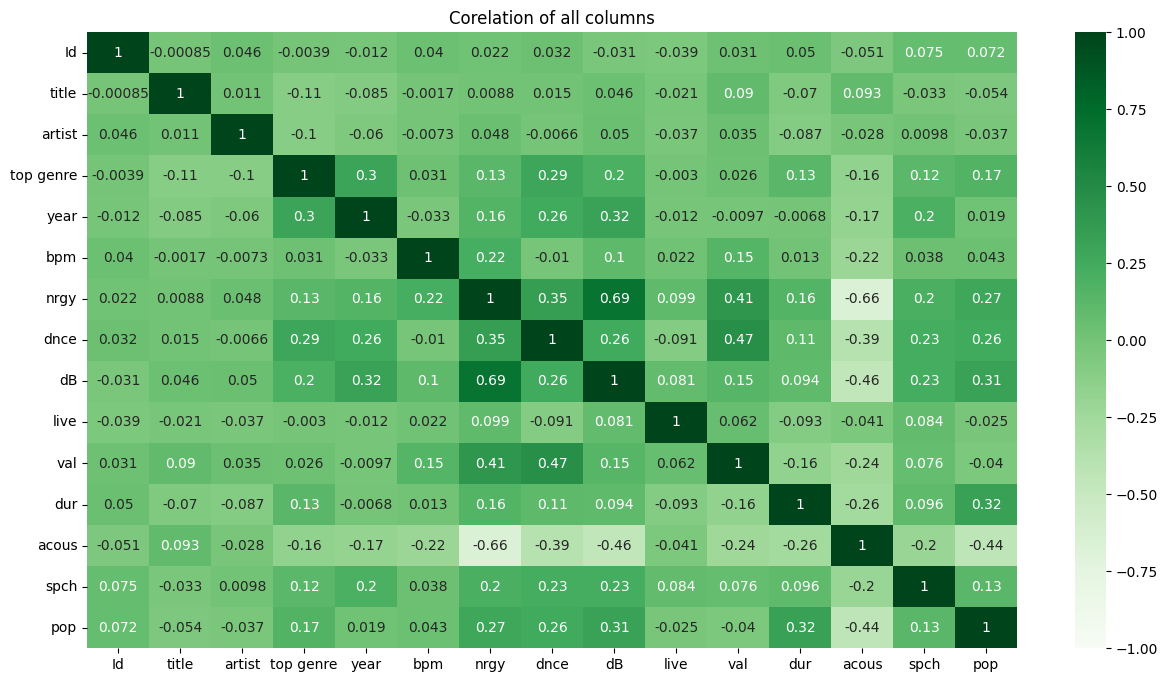

In [38]:
# corelation before remove outliner
corelation = trainDataClean.corr()
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(trainDataClean.corr(), center=0, cmap='Greens',vmin=-1, vmax=1, annot=True)
ax.set_title('Corelation of all columns')

In [39]:
th = 5
outlinerList={}
outlinerCols = trainDataClean.columns
for col in outlinerCols:
    mean = np.mean(trainDataClean[col])
    std=np.std(trainDataClean[col])
    out_list=[]
    for i in trainDataClean[col]:
        z=(i-mean)/std
        if z > th:
            out_list.append(i)
    if (out_list):
        outlinerList[col]= out_list
print("outliers : ", outlinerList)

outliers :  {'live': [93], 'spch': [38, 37, 36, 47]}


In [40]:
#extract outliner

print("before remove outliner:",trainDataClean.shape)
for key,value in outlinerList.items():
    print(key,value)
    for i in value:
        trainDataClean.drop(trainDataClean[trainDataClean[key]==i].index, inplace = True)

print("after remove outliner:",trainDataClean.shape)

before remove outliner: (438, 15)
live [93]
spch [38, 37, 36, 47]
after remove outliner: (433, 15)


In [41]:
# seperated list - train data

print('train data info:',trainDataClean.info())
print('test data info:',testData.info())

# seperate x and y
y = trainDataClean["pop"]
#x = trainDataClean.drop(columns=["Id","artist","title","year","pop","top genre"])
x = trainDataClean[["top genre","nrgy","dnce","spch","dB","dur"]]
stdScaler = StandardScaler()
xScaled = stdScaler.fit_transform(x)

# for polynomial 
polyFeat = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeat.fit_transform(x)
xPolyScaled = stdScaler.fit_transform(xPoly)

# for first training - scaled
xTrain, xTrainTest, yTrain, yTrainTest = train_test_split(xScaled, y, test_size=0.25, random_state=42)


# for first training - scaled poly
xTrainPoly, xTrainPolyTest, yTrainPoly, yTrainPolyTest = train_test_split(xPolyScaled, y, test_size=0.25, random_state=42)




<class 'pandas.core.frame.DataFrame'>
Int64Index: 433 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Id         433 non-null    int64
 1   title      433 non-null    int64
 2   artist     433 non-null    int64
 3   top genre  433 non-null    int64
 4   year       433 non-null    int64
 5   bpm        433 non-null    int64
 6   nrgy       433 non-null    int64
 7   dnce       433 non-null    int64
 8   dB         433 non-null    int64
 9   live       433 non-null    int64
 10  val        433 non-null    int64
 11  dur        433 non-null    int64
 12  acous      433 non-null    int64
 13  spch       433 non-null    int64
 14  pop        433 non-null    int64
dtypes: int64(15)
memory usage: 54.1 KB
train data info: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0  

KeyError: ('top genre', 'nrgy', 'dnce', 'spch', 'dB', 'dur')

In [ ]:
sns.boxplot(data=trainDataClean)
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

In [ ]:
g = sns.PairGrid(trainDataClean.drop(columns=["Id","artist","title","year"]))

g.map_upper(sns.regplot)
g.map_lower(sns.histplot)

In [ ]:
# seperate list - test data
#xTest = testDataClean.drop(columns=["top genre","Id","artist","title","year"])

xTest = testDataClean[["top genre","nrgy","dnce","spch","dB","dur"]]

stdScaler = StandardScaler()
xScaledTest = stdScaler.fit_transform(xTest)

polyFeat = PolynomialFeatures(degree=2, include_bias=False)
xPolyScaledTest = polyFeat.fit_transform(xTest)
xPolyScaledTest = stdScaler.fit_transform(xPolyScaledTest)

In [ ]:
# 1)Decision Tree Regression
# scaled x is not applied for this sample as decision tree do not require scaling
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=5) # explore min_samples = e.g. put to 1 to see what happens
tree.fit(x,y)
#predTreeTrain = tree.predict(x) # Check fit
#linearMse = mean_squared_error(y, predTreeTrain)
#linearRmse = np.sqrt(linearMse)
#print("Tree Rmse:",linearRmse)
# Check on test set
predTreeTest = tree.predict(xTest) 
print(predTreeTest)
np.savetxt("my_data_tree.csv", predTreeTest, delimiter=",", 
           header="pop", comments="")

In [ ]:
# 2) poly SVR
# instead of scaled x , we use scaled polynomial featured x (degree=2)as we are going to apply poly SVR(degree=2))
from sklearn.svm import SVR
svrPoly = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
#ßsvrPoly.fit(xTrainPoly,yTrainPoly)
#ypred = svrPoly.predict(xTrainPolyTest)
#linearMse = mean_squared_error(yTrainPolyTest, ypred)
#linearRmse = np.sqrt(linearMse)
#print("linearRmse",linearRmse)

# Check on test set
svrPoly.fit(xPolyScaled,y)
predSVRPolyTest = svrPoly.predict(xPolyScaledTest) 
print(predSVRPolyTest)
np.savetxt("my_data_SVR.csv", predSVRPolyTest, delimiter=",", 
           header="pop", comments="")

In [ ]:
# 3) bagging with polySVR
from sklearn.ensemble import BaggingRegressor

baggedPolySVRReg = BaggingRegressor(base_estimator=SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale"),n_estimators=10, random_state=0,bootstrap=True, n_jobs=-1)
#baggedPolySVRReg.fit(xTrainPoly,yTrainPoly)
#ypred = baggedPolySVRReg.predict(xTrainPolyTest)
#linearMse = mean_squared_error(yTrainPolyTest, ypred)
#linearRmse = np.sqrt(linearMse)
#print("linearRmse",linearRmse)

# Check on test set
baggedPolySVRReg.fit(xPolyScaled,y)
predbaggedSVRPolyTest = baggedPolySVRReg.predict(xPolyScaledTest)     
print(predbaggedSVRPolyTest)
np.savetxt("my_data_bagged_SVR.csv", predbaggedSVRPolyTest, delimiter=",", 
           header="pop", comments="")

In [ ]:
# 4) bagging with randomForest

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

baggedRFReg = BaggingRegressor(base_estimator=RandomForestRegressor(max_leaf_nodes=50, n_jobs=-1),n_estimators=10, random_state=0,bootstrap=True, n_jobs=-1)
#baggedRFReg.fit(xTrain,yTrain)
#ypred = baggedRFReg.predict(xTrainTest)
#linearMse = mean_squared_error(yTrainTest, ypred)
#linearRmse = np.sqrt(linearMse)
#print("linearRmse",linearRmse)

# Check on test set
baggedRFReg.fit(xPolyScaled,y)
predbaggedSVRPolyTest = baggedRFReg.predict(xPolyScaledTest)     
print(predbaggedSVRPolyTest)
np.savetxt("my_data_bagged_SVR.csv", predbaggedSVRPolyTest, delimiter=",", 
           header="pop", comments="")

In [ ]:
rf = RandomForestRegressor(max_leaf_nodes=50, n_jobs=-1)
rf.fit(xScaled,y)
rf.feature_importances_

In [ ]:
# 5) Gradient Boosting Regressor
# train data
from sklearn.ensemble import GradientBoostingRegressor
gradBoostReg = GradientBoostingRegressor(random_state=0)
#ßßgradBoostReg.fit(xTrain,yTrain)
#ypred = gradBoostReg.predict(xTrainTest)
#linearMse = mean_squared_error(yTrainTest, ypred)
#linearRmse = np.sqrt(linearMse)
#print("linearRmse",linearRmse)

# test data
gradBoostReg.fit(xScaled,y)
predGradBoostReg = gradBoostReg.predict(xScaledTest)     
print(predGradBoostReg)
np.savetxt("my_data_grad_boost.csv", predGradBoostReg, delimiter=",", 
           header="pop", comments="")